# Elemzés: választási adatok

Adatok a valasztas.hu és a KSH adatai alapján. Letöltés: 2019. május.

Megjegyzés: a valasztas.hu oldalán 2019. május végén megtalálhatóak voltak a belföldi szavazókörökre lebontott eredmények letölthető, Excel formátumban, azonban 2019. június 3-án már nem.

In [1]:
%run definitions.ipynb

In [2]:
verbose_print = False
%run valasztasi_adatok_elemzese_01_adatimport.ipynb

Levélszavazatok forrása: https://www.valasztas.hu/levelszavazas-eredmenye_ep2019
Külképviseleti adatok forrása: https://www.valasztas.hu/kulkepviseleti-szavazas-eredmenye_ep2019
Beföldi választási adatok forrása (2019. május): https://www.valasztas.hu/ep2019
Települési adatok forrása: KSH 2011-es helyiségnévkönyv: http://www.ksh.hu/docs/hun/hnk/Helysegnevkonyv_adattar_2011.xls
Megyei szintű adatok forrása: KSH: https://www.ksh.hu/
Térkép shapefile forrás: https://gadm.org/download_country_v3.html

Összes település (egy fővárosi kerület egy településnek minősül): 3177

A településekből község: 2809 (88.42%)
	A községekből nem Pest megyei község: 2676 (95.27%)

A településekből (nem megyei/fő-) város: 322 (10.14%)
	A városokból nem Pest megyei város: 269 (83.54%)


## Belföldi eredmények

Text(0.5, 1.0, 'Belföldi szavazóköri összesített eredmények')

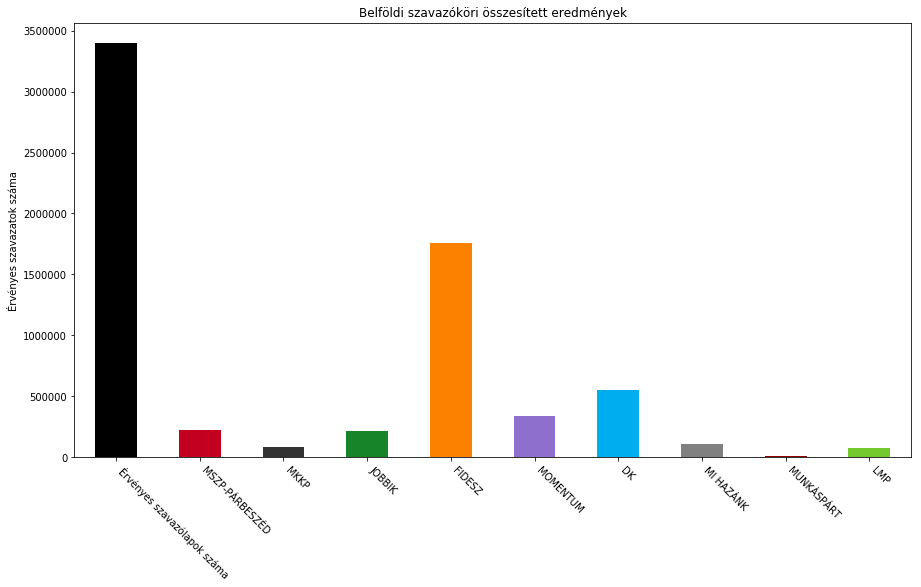

In [3]:
belfoldi_osszesitett.loc[["Érvényes szavazólapok száma"]+partok].plot(kind='bar', rot=-45, figsize=(15,8), color=['black']+partok_szine)
plt.xticks(ha='left')
plt.ylabel('Érvényes szavazatok száma')     
plt.title("Belföldi szavazóköri összesített eredmények")

### A pártokra adott szavazati arányok közti korrelációk:

In [4]:
colour_cm(valasztasi_corr, matrixtitle="Korrelációk a pártok települési eredményei között")

Loading BokehJS ...

A mátrix értelmezése: a pozitív korreláció X és Y párt között azt jelenti, hogy azokon a településeken, ahol X párt jól teljesít, ott Y párt is, ahol pedig X rosszul, ott Y is. A negatív korreláció fordított összefüggést jelent. Minél közelebb van a korrelációs együttható (r) abszolút értéke 1-hez, annál erősebb az összefüggés: minél közelebb van 0-hoz, annál gyengébb az összefüggés (0.1 alatt nem beszélhetünk még csak gyenge korrelációról sem).

Amit megállapíthatunk:

* A **Fideszre adott szavazatok aránya mindegyik más pártéval negatívan korrelál**, de legkevésbé a Mi Hazánk, Munkáspárt és LMP esetében. 

* A **Momentum** %-os eredménye viszont **pozitívan** korrelál az **LMP, DK, az MSZP-Párbeszéd és az MKKP** eredményével, leginkább az MKKP-jéval.

* A **Jobbik, illetve a Fidesz** %-os eredménye negatívan korrelál az **MKKP**-jével; az MKKP esetében a Momentum eredményével való pozitív korreláción kívül más párt eredményével nincs korreláció.

### Megyei eredmények

**Részvételi arány**

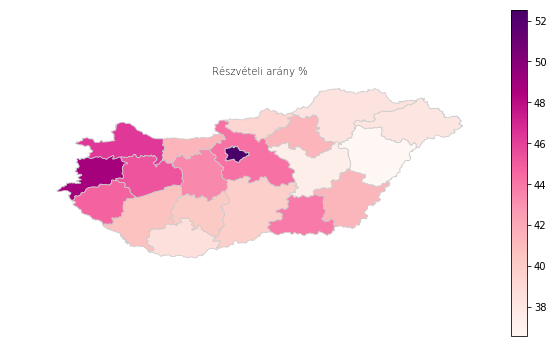

In [5]:
col_to_use = "Részvételi arány %"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title(col_to_use,
                 fontdict={'fontsize': '10', 'fontweight' : '3'})
my_cmap = 'RdPu' ## Ez egyik párt színével sem téveszthető össze
vmin_to_use = megyei_adatok[col_to_use].min()
vmax_to_use = megyei_adatok[col_to_use].max()
colorm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin_to_use, vmax=vmax_to_use))
colorm._A = []
cbar = fig.colorbar(colorm)
megyei_geoadatok.plot(column=col_to_use, cmap=my_cmap, vmin=vmin_to_use, vmax=vmax_to_use, linewidth=0.8, ax=ax, edgecolor='0.8')

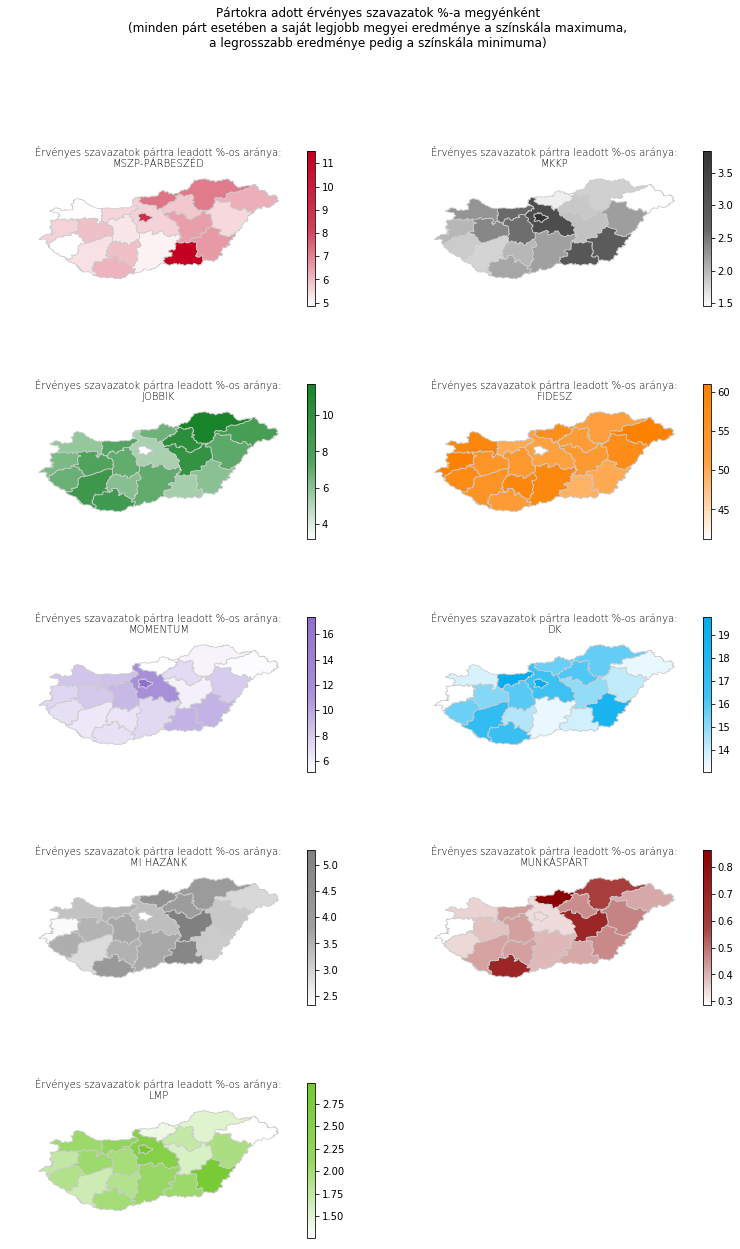

In [6]:
mytitle = '''Pártokra adott érvényes szavazatok %-a megyénként
(minden párt esetében a saját legjobb megyei eredménye a színskála maximuma,
a legrosszabb eredménye pedig a színskála minimuma)'''
megyei_adatok_plot(mytitle,  my_vmax="partymax")

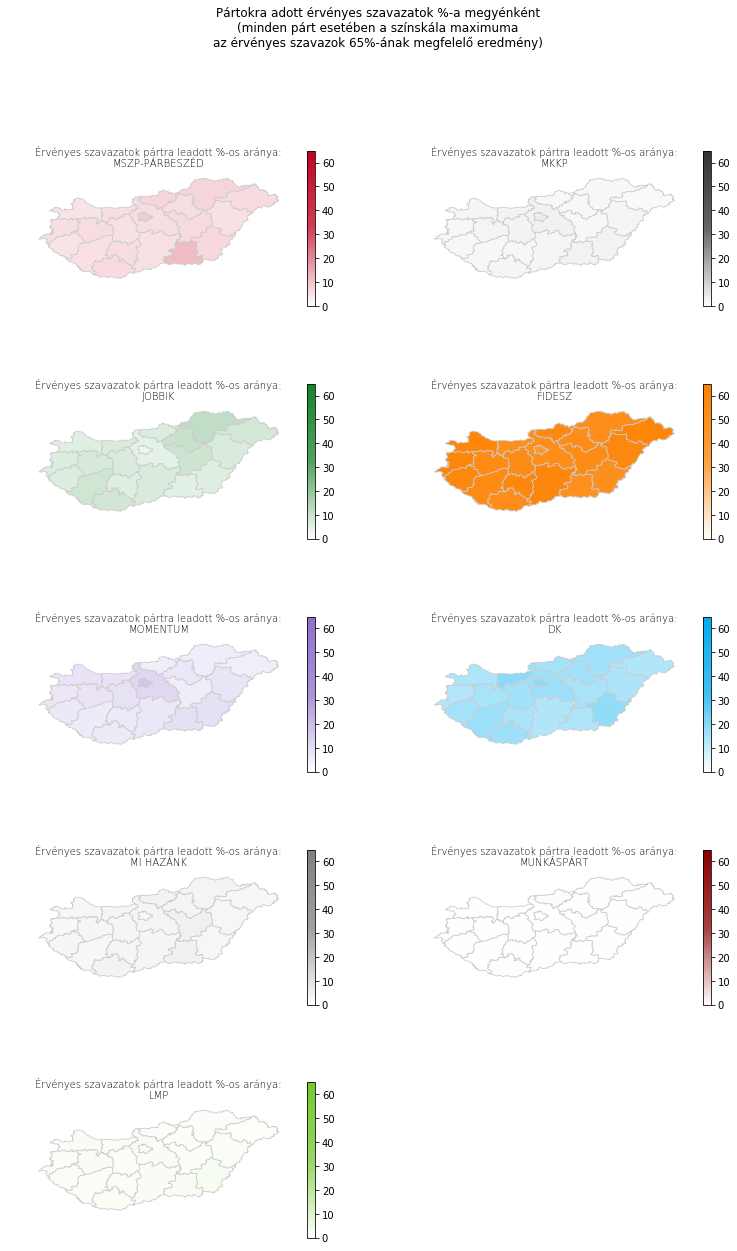

In [7]:
mytitle = '''Pártokra adott érvényes szavazatok %-a megyénként
(minden párt esetében a színskála maximuma
az érvényes szavazok 65%-ának megfelelő eredmény)'''
megyei_adatok_plot(mytitle, my_vmax=65)

## Eredmények a szavazás helyének jellege szerint

Text(0, 0.5, 'Érvényes szavazatok pártra leadott %-os aránya')

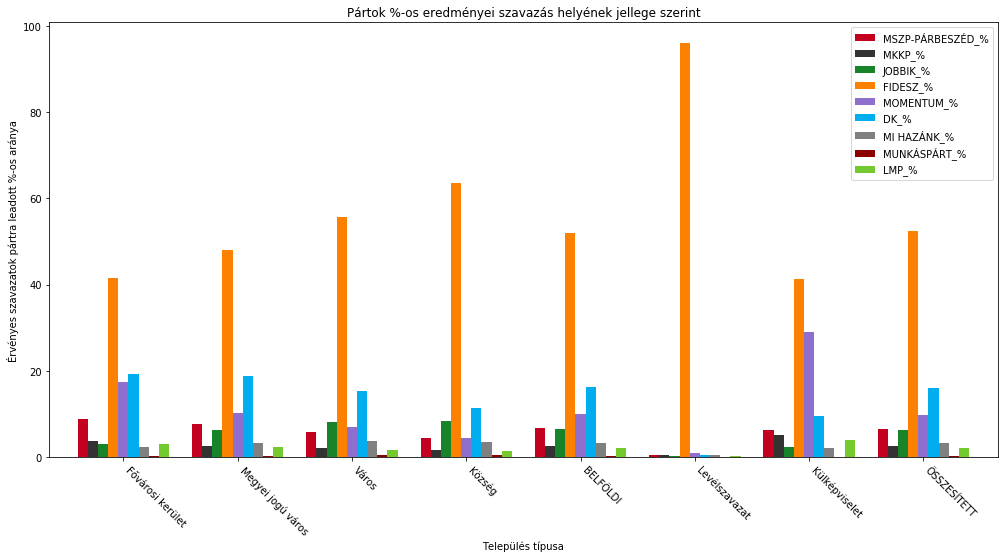

In [8]:
telepulestipus_szerint.plot(kind='bar', width=0.8, rot=-45, figsize=(17,8), color=partok_szine, 
         title="Pártok %-os eredményei szavazás helyének jellege szerint")
plt.xticks(ha='left')
plt.ylabel('Érvényes szavazatok pártra leadott %-os aránya')

Text(0, 0.5, 'Érvényes szavazatok pártra leadott %-os aránya')

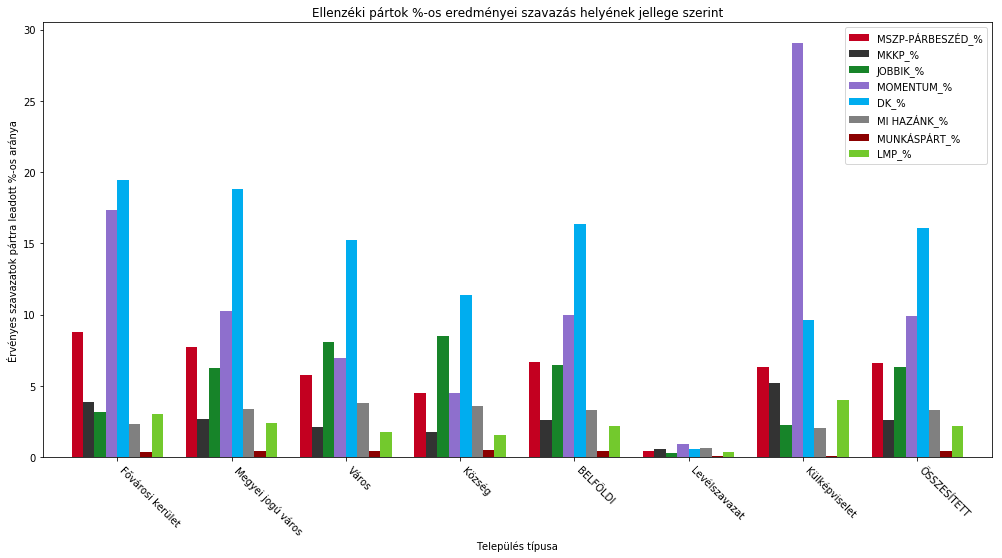

In [9]:
telepulestipus_szerint.loc[:, [c for c in telepulestipus_szerint.columns if "FIDESZ" not in c]].plot(kind='bar', width=0.8, rot=-45, figsize=(17,8), color=ellenzeki_partok_szine, 
         title="Ellenzéki pártok %-os eredményei szavazás helyének jellege szerint")
plt.xticks(ha='left')
plt.ylabel('Érvényes szavazatok pártra leadott %-os aránya')

* Az MKKP és a Momentum teljesítettek erősen a **külképviseleti** szavazók között; a Momentum eredménye a külképviseleti szavazatok esetén megközelítette a Fideszét is.
* A **levélszavazatok** egyértelműen a Fideszt erősítették.
* Az MSZP-PÁRBESZÉD, MKKP, Momentum, LMP a minél **nagyobb településeken** teljesített jobban, míg a Fidesz, a Jobbik és a Mi Hazánk a kisebbeken.

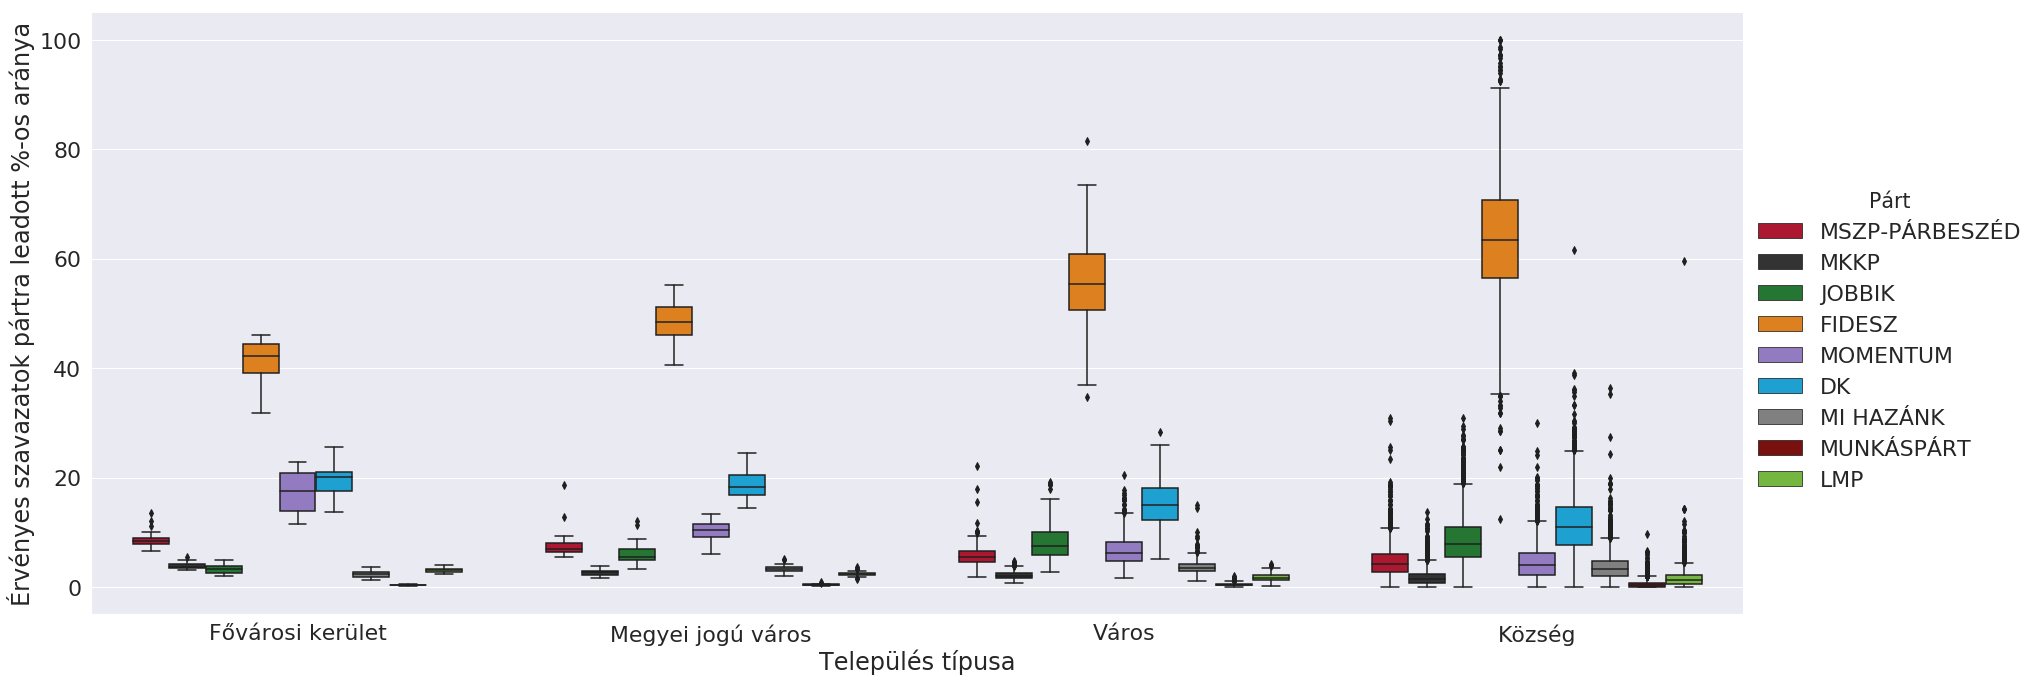

In [10]:
sns.set(font_scale=2)
sns.catplot(x="Település típusa", 
            y='Érvényes szavazatok pártra leadott %-os aránya', 
            #row="Település típusa",
            hue="Párt", 
            data=telepulestipus_szerint_osszes_telepules, 
            kind='box', width=0.8,
            height=10, aspect=2.5, 
            palette=partok_szine)
mpl.rcParams.update(mpl.rcParamsDefault)

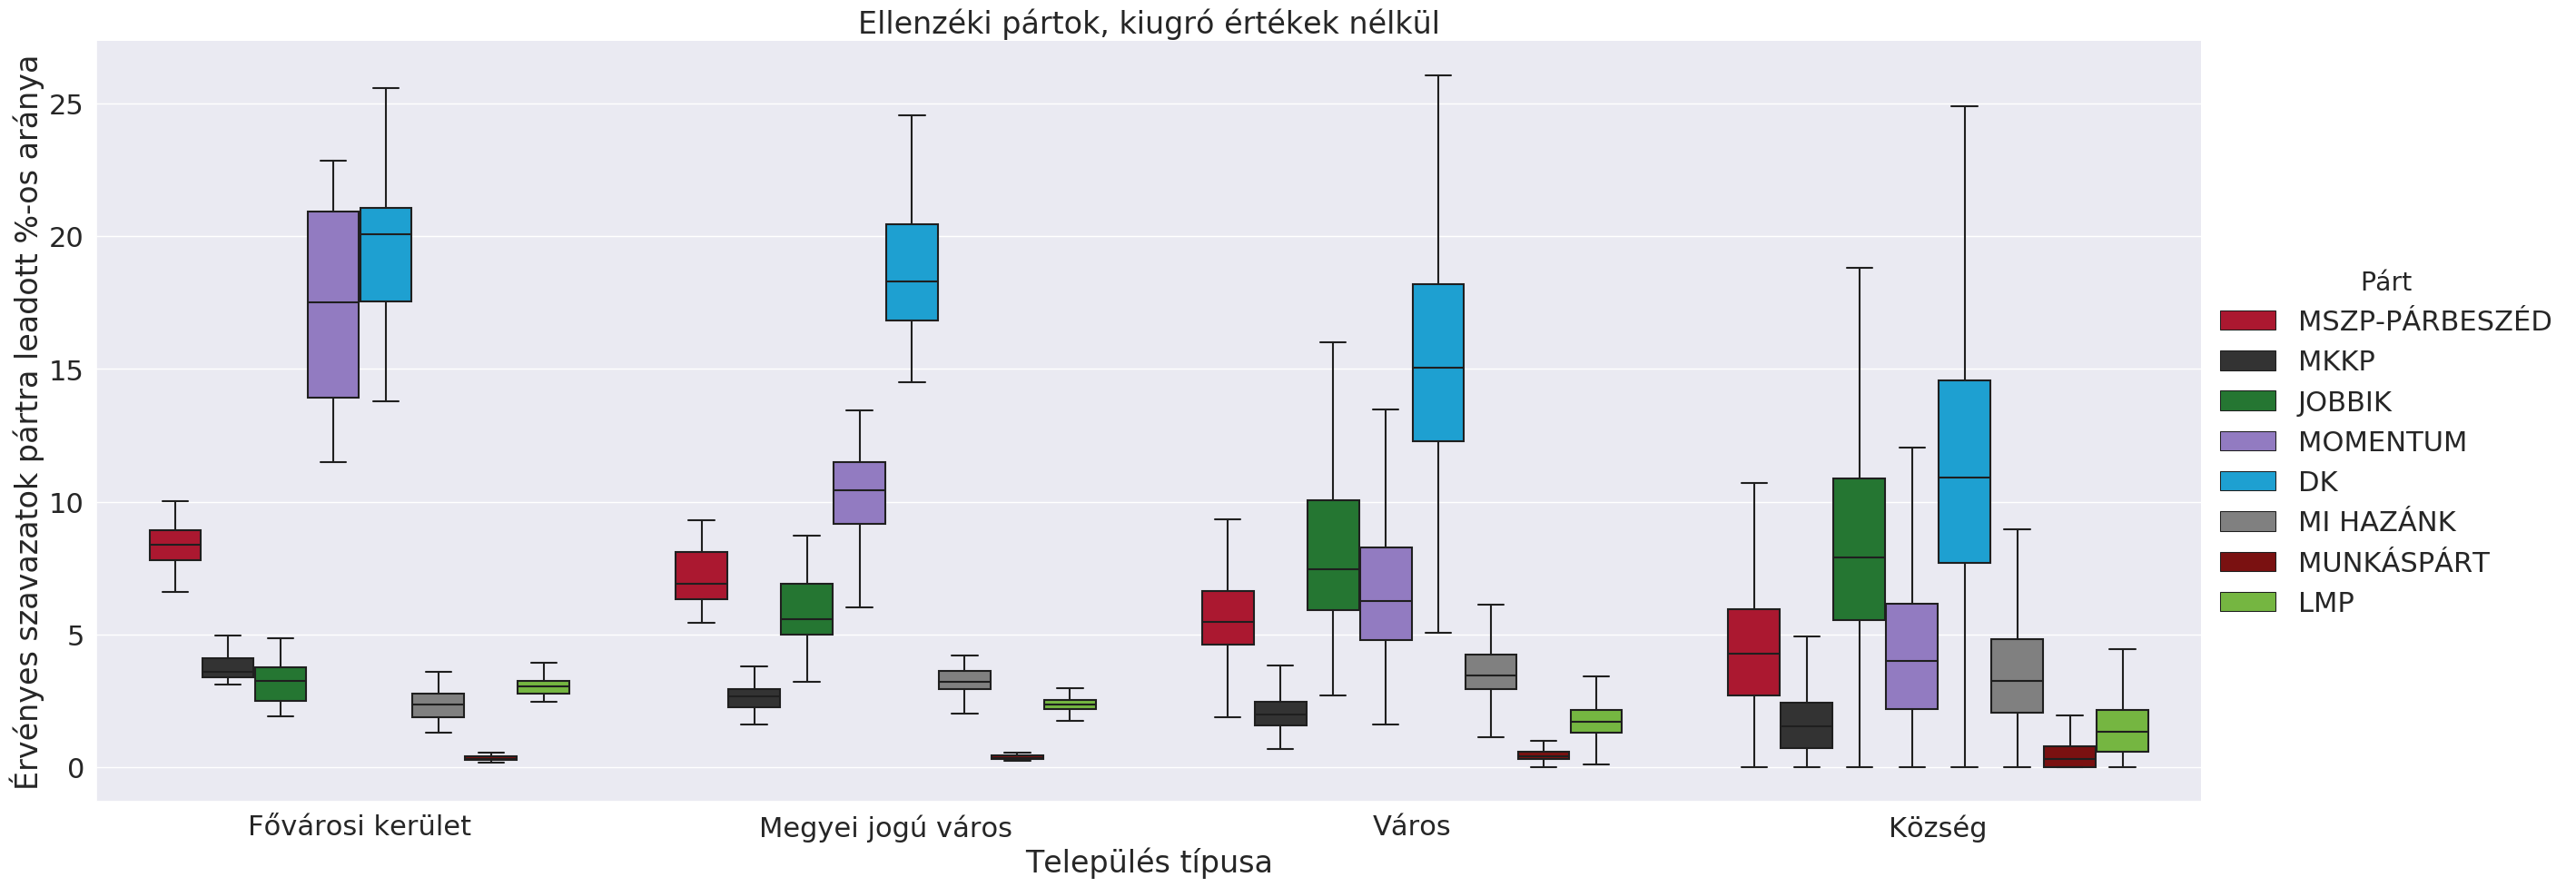

In [11]:
tmp = telepulestipus_szerint_osszes_telepules[telepulestipus_szerint_osszes_telepules['Párt'] != "FIDESZ"].copy()
tmp['Párt'] = tmp['Párt'].cat.remove_unused_categories()
sns.set(font_scale=2)
sns.catplot(x="Település típusa", 
            y='Érvényes szavazatok pártra leadott %-os aránya', 
            #row="Település típusa",
            hue="Párt", 
            data=tmp,
            kind='box', width=0.8,
            height=10, aspect=2.5, 
            palette=ellenzeki_partok_szine,
           showfliers=False)
plt.title("Ellenzéki pártok, kiugró értékek nélkül")
mpl.rcParams.update(mpl.rcParamsDefault)
del tmp

In [12]:
valasztasi_adatok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177 entries, 0 to 3176
Columns: 251 entries, Település to LMP_szavazóképes_lakosság_%
dtypes: category(1), float64(147), int64(100), object(3)
memory usage: 6.1+ MB


## Korrelációk az egyes mutatókkal

Fontos hangsúlyozni, hogy a *KSH területi adatai többnyire megye-szintűek*, így a legtöbb rendelkezésre álló mutató az adott település megyéjét jellemzi, nem magát a települést.

A **2011-es adatok település-szintűek**, a 2011-es helyiségnévkönyvből származnak. Az **évszám nélküli mutatók** mind a választással kapcsolatos, település szintű mutatók. (Egy fővárosi kerület egy településnek minősül.)

A legtöbb **megyei** mutatóban egy **2001-2005** közötti évből, valamint **2017-ből vagy 2018-ból** származnak az adatok (attól függően, hogy mely években voltak a teljes országot lefedő adatok), emellett a mutatókra a későbbi és a korábbi év arányát is használjuk mutatóként.

Alább elsősorban **csak azokat a mutatókat** ábrázoljuk, amelyek **legalább egy párt eredményével legalább r=0.2 mértékű korrelációt mutatnak.**

Fontos hangsúlyozni a korrelációs értékekkel kapcsolatban:
* A korrelációból semmilyen irányban nem következik oksági viszony.
* Az egyes mutatók sokszor erősen korrelálnak egymással (ld. erről alább).
* Konkrétan láttuk, hogy a település típusa igen meghatározó, márpedig a legtöbb, még megyei szintű mutató is erősen összefügg a megyében található települések típusával (Budapest a legkiugróbb). 
    * Ezért a pártok eredményeit különböző típusú településekre szorítkozva is érdemes vizsgálni. Pl.: csak városok, csak községek, csak nem Pest megyei községek.

### **Korrelációk az egyes mutatók és a pártok eredményei között -- az összes belföldi településre**

In [13]:
colour_cm(result_above20_r, pwidth=0.09, pheight=0.3, matrixtitle="Korrelációk pártok eredményeivel")

Loading BokehJS ...

Az első sorok (többek között) egymással is erősen korrelálnak, mindegyik a nagyobb lakónépességű települések esetében nagyobb, ld. **a mutatók közti korrelációkat**:

In [14]:
print("A pártok eredményeivel legalább r=0.2 szinten korreláló mutatók egymással való korrelációja:")
colour_cm(input_vars.loc[:, [i for i in result_above20_r.index]].corr(), pwidth=0.3, pheight=0.3)

A pártok eredményeivel legalább r=0.2 szinten korreláló mutatók egymással való korrelációja:


Loading BokehJS ...

### Korrelációk az egyes mutatók és a pártok eredményei között -- csak a városokra szorítkozva

In [15]:
print("Korrelációk az egyes mutatók és a pártok (nem megyei/fő-) városi eredménye között:")
colour_cm(result_varos_above20_r, pwidth = 0.08, pheight=0.4)

Korrelációk az egyes mutatók és a pártok (nem megyei/fő-) városi eredménye között:


Loading BokehJS ...

A nem megyei jogú városokban a következő állapítható meg:

* A Fidesz és Jobbik eredménye negatívan korrelál a **megjelentek számával, a lakónépességgel és a lakósűrűséggel** (ezek mind egymással korreláló mutatók), míg a Momentum, az MKKP, a DK és az LMP eredményei pozitívan, legerősebben a Momentumé. Az MSZP-PÁRBESZÉD esetén is egy gyenge pozitív korreláció mutatkozik.

* A keresőképes korú lakosság gyermekek és idősek számához viszonyított arányában kétféle trend van: a felnőttek és gyermekek aránya a Momentum és MMKP eredményével

### Korrelációk az egyes mutatók és a pártok eredményei között -- csak a községekre szorítkozva

In [16]:
print("Korrelációk az egyes mutatók és a pártok községi eredménye között:")
colour_cm(result_kozseg_above20_r, pwidth = 0.17, pheight=0.5)

Korrelációk az egyes mutatók és a pártok községi eredménye között:


Loading BokehJS ...

* A Momentum, a DK és az MKKP inkább a **sűrűn lakott, nagyobb településeken** teljesített jól, míg a Fidesz és a Jobbik esetében épp fordított a trend. Főként a Momentum és a Fidesz esetén erős ez az összefüggés. Ugyanez vonatkozik a gazdasági mutatókra, úgy mint nettó kereset, munkanélküliség, egy főre jutó GDP, valamint -- kissé kisebb korrelációval az olyan mutatókra, mint személygépkocsik száma, vezetékes internet előfizetések száma, nonprofit szervezetek száma. Ezek a mutatók egymással nagyon korrelálnak. 

* Ahol 2001-hez képest **nőtt a lakosság száma (akármelyik korosztályban)**, ott a Momentum jobban, a Jobbik rosszabbul teljesített. 

* Ahol viszont 2001-hez képest **nőtt a 15-64 és 0-14 év közöttiek aránya** (azaz egy keresőkorú lakosra kevesebb gyermek jut, mint korábban), ott a Momentum, valamint a DK és az MKKP rosszabbul, a Jobbik és a Fidesz jobban teljesített.

* **Pest megyében** a Momentum, és kisebb mértékben az MKKP teljesített jobban, míg **Borsod-Abaúj Zemplénben** ez a két párt rosszul, a Jobbik és kisebb mértékben az MSZP-PÁRBESZÉD jól. A többi megye esetében nem volt 0.2 feletti korreláció egyik párt eredményével sem.

#### Pest megyén kívüli községek esetén a korrelációk egyes mutatókkal

In [17]:
print("Korrelációk az egyes mutatók és a pártok nem Pest megyei községi eredménye között:")
colour_cm(result_kozseg_nonpest_above20_r, pwidth = 0.22, pheight=0.5)

Korrelációk az egyes mutatók és a pártok nem Pest megyei községi eredménye között:


Loading BokehJS ...

A nem Pest megyei községekre szorítkozva a következőt látjuk:

* Az MSZP-PÁRBESZÉD és a Jobbik a **rosszabb gazdasági és infrastrukturális helyzetű** nem-pesti településeken teljesített jól, míg az MKKP és a Momentum a gazdaságilag jobban teljesítőkben teljesítettek jobban. A nettókereset, munkanélküliségi-aktivitási mutatók és GDP per fő mellett ide érthetők olyan infrastrukturális és 

* A **szociális mutatók** tekintetében az olyan mutatóknál, mint a szociális étkeztetésben részesülők, a hátrányos helyzetű kiskorúak, a bűnelkövetők száma, a bűnelkövetők között a fiatalkorúak aránya és az várható élettartam, a rosszabb mutatójú településeken erősebb elsősorban  a Jobbik, illetve bizonyos szinten az MSZP-PÁRBESZÉD, és a jobb mutatókkal korrelál a Momentum és az MKKP eredménye.

* A **pedagógusok, köznevelési intézmények, non-profit szervezetek, illetve gyógyszertárak száma (a megyében)** a Jobbik eredményével korrelál pozitívan, a többi párt esetén nincs, vagy gyenge a korreláció.

* A Jobbik Borsod-Abaúj-Zemplén megyében jól teljesített.

* A nem Pest megyei községek esetén már a **lakónépesség** a Jobbik eredményével korrelál legjobban, a Momentuméval a legkevésbé. Az előző mutatók korrelációja a nem Pest megyei községek esetén a lakónépességgel legtöbb esetben olyan mértékű pozitív vagy negatív irányban, hogy önmagában a lakónépesség mint mutató megmagyarázza az előző korrelációkat.

* A **részvételi arány** a Fidesz, a Momentum és az MKKP eredményével korrelál pozitívan, a Jobbik és az MSZP-PÁRBESZÉD eredményével negatívan. Mivel a nem Pest megyei községeknél ez negatívan korrelált a lakónépességgel, ezek a korrelációk sem meglepőek a lakónépességgel való korrelációk fényben (és fordítva).

In [18]:
print("A pártok eredményeivel legalább r=0.2 szinten korreláló mutatók egymással való korrelációja a nem Pest megyei községekre szorítkozva:")
colour_cm(input_vars[mask].loc[:, [i for i in result_kozseg_nonpest_above20_r.index]].corr(), pwidth=0.4, pheight=0.4)

A pártok eredményeivel legalább r=0.2 szinten korreláló mutatók egymással való korrelációja a nem Pest megyei községekre szorítkozva:


Loading BokehJS ...

### Nemzetiségi önkormányzatok

In [19]:
print("Teljes településlista esetén:")
colour_cm(result.loc[[c for c in result.index if c.startswith("önkormányzat_")], :],
          matrixtitle="A településen volt-e nemzetiségi önkormányzat",
         pwidth=0.65, pheight=0.6)

Teljes településlista esetén:


Loading BokehJS ...

In [20]:
print("Városok esetén:")
colour_cm(result_varos.loc[[c for c in result_varos.index if c.startswith("önkormányzat_")], :],
          matrixtitle="A településen volt-e nemzetiségi önkormányzat",
         pwidth=0.65, pheight=0.6)

Városok esetén:


Loading BokehJS ...

A (nem megyei jogú) városokra szorítkozva:

* A Momentum, az MKKP, a DK és az LMP tipikusan erősebbek ott, ahol **van nemzetiségi önkormányzat**, szemben a Fidesszel, amely ellenkező korrelációt mutat.
* Kivétel a **cigány önkormányzat**, amelynek megléte negatívan korrelál a Momentum, MKKP és LMP eredményével, és pozitívan a Fideszével és a Jobbikéval.
* Kivétel továbbá a **román, szlovén** és (bizonyos mértékig) **ukrán** önkormányzatok megléte, amelyek nem eredményt befolyásoló erős mutatók.
* Az **MSZP-PÁRBESZÉD** eredménye kevéssé korrelál a nemzetiségi önkormányzatokkal; legerősebben (de továbbra is csak gyengén) a lengyellel korrelál, ezzel pozitívan.



In [21]:
print("Községek esetén:")
colour_cm(result_kozseg.loc[[c for c in result_kozseg.index if c.startswith("önkormányzat_")], :],
          matrixtitle="A településen volt-e nemzetiségi önkormányzat",
         pwidth=0.65, pheight=0.6)

Községek esetén:


Loading BokehJS ...

In [22]:
print("Nem Pest megyei községek esetén:")
colour_cm(result_kozseg_nonpest.loc[[c for c in result_kozseg_nonpest.index if c.startswith("önkormányzat_")], :],
          matrixtitle="A településen volt-e nemzetiségi önkormányzat",
         pwidth=0.65, pheight=0.6)

Nem Pest megyei községek esetén:


Loading BokehJS ...

A nemzetiségi önkormányzatok meglétével **nem találunk erős korrelációkat a községekre szorítkozva**. Amit látunk:

* A **cigány önkormányzattal** rendelkező településeken gyengébb a Momentum és az MKKP (ahogy a városokban is).
* A **német önkormányzattal** rendelkező településeken kissé erősebb a Momentum (ahogy a városokban is).

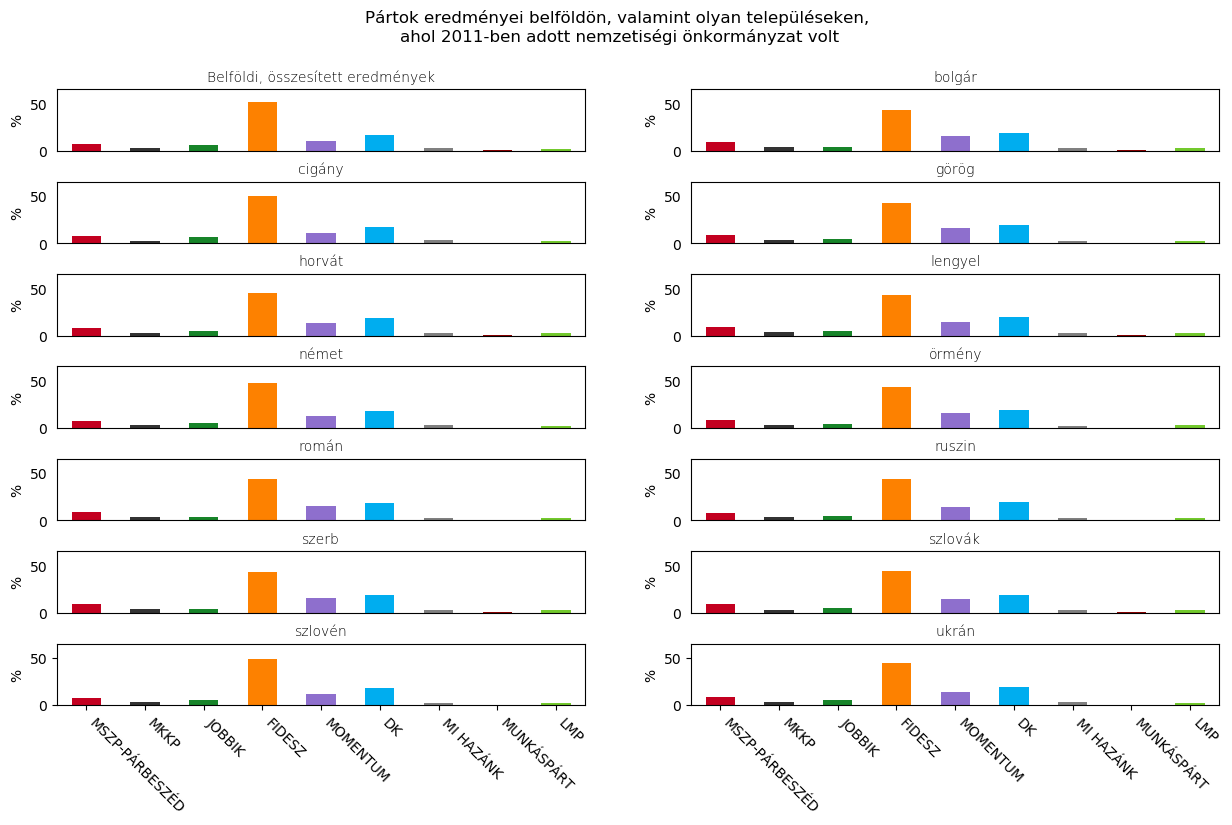

In [23]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("""Pártok eredményei belföldön, valamint olyan településeken, 
ahol 2011-ben adott nemzetiségi önkormányzat volt""")

for i in range(len(nemzetisegi_onkorm)+1):
    ax = fig.add_subplot(int(np.ceil(len(nemzetisegi_onkorm)/2)),2,i+1)
    
    if i == 0:
        ax.set_title("Belföldi, összesített eredmények",
            fontdict={'fontsize': '10', 'fontweight' : '3'})

        tmp = belfoldi_osszesitett.loc[list(map(lambda x: x+"_%", partok))]

    else:
        nemzetiseg = nemzetisegi_onkorm[i-1][13:]
        nemzetiseg = nemzetiseg[:-5]
        #ax.axis('off')
        ax.set_title(nemzetiseg,
                    fontdict={'fontsize': '10', 'fontweight' : '3'})
        tmp = (valasztasi_adatok[valasztasi_adatok[nemzetisegi_onkorm[i-1]]==1].loc[:, ["Érvényes szavazólapok száma"]+partok]).sum()
        for p in range ( len( partok )):
            tmp[cols_partra_adott_szavazatok_szazalekban[p]] = tmp[partok[p]] / tmp["Érvényes szavazólapok száma"] * 100
        tmp = tmp.loc[[c for c in tmp.index if c.endswith("_%")]].rename(lambda x: x[:-2])

    tmp.plot(kind='bar', rot=-45, figsize=(15,8), color=partok_szine)
    plt.xticks(ha='left')
    plt.ylim(0, 65) 
    plt.grid(False)
    plt.ylabel('%')     
    if i < len(nemzetisegi_onkorm)-1:
        # hide tick and tick label of the big axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                       #labelcolor='none', 
                        )
        plt.xticks([])


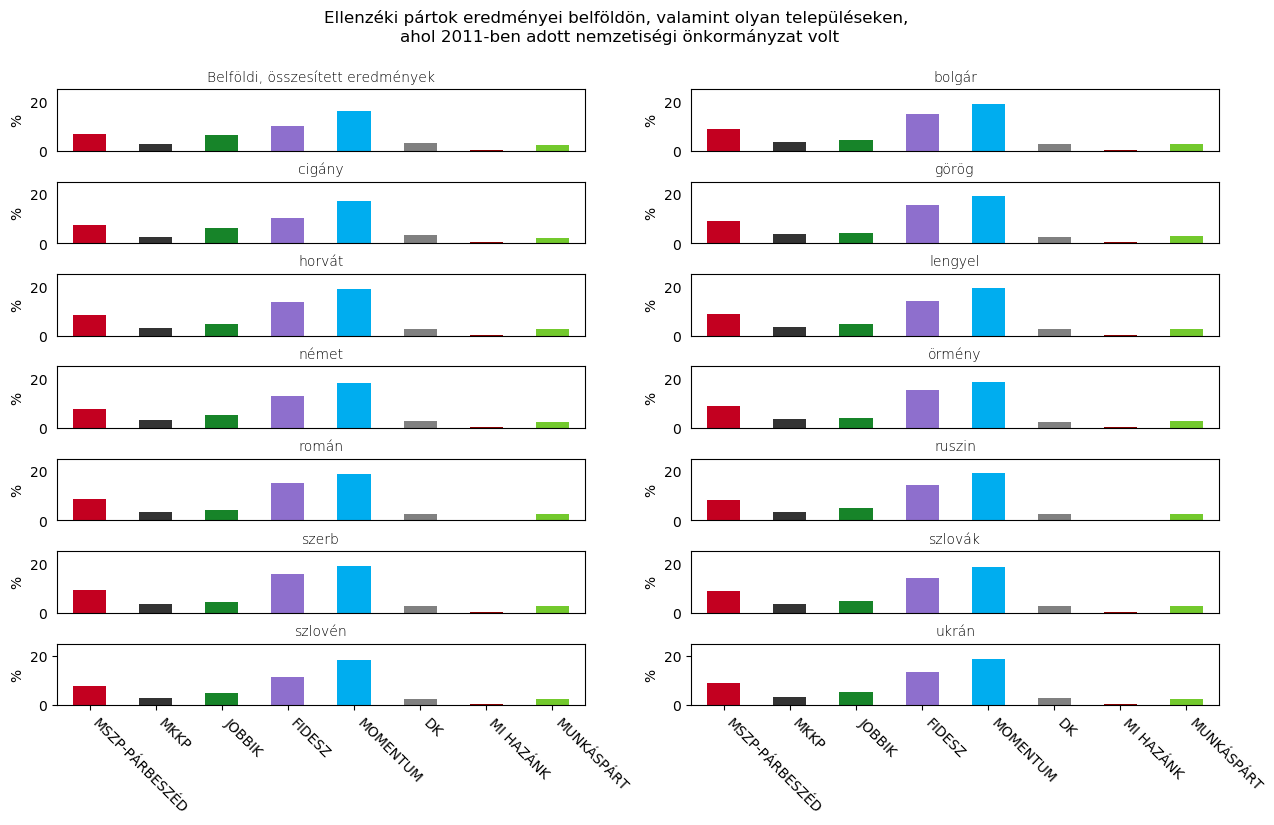

In [24]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("""Ellenzéki pártok eredményei belföldön, valamint olyan településeken, 
ahol 2011-ben adott nemzetiségi önkormányzat volt""")

for i in range(len(nemzetisegi_onkorm)+1):
    ax = fig.add_subplot(int(np.ceil(len(nemzetisegi_onkorm)/2)),2,i+1)
    
    if i == 0:
        ax.set_title("Belföldi, összesített eredmények",
            fontdict={'fontsize': '10', 'fontweight' : '3'})

        tmp = belfoldi_osszesitett.loc[list(map(lambda x: x+"_%", ellenzeki_partok))]

    else:
        nemzetiseg = nemzetisegi_onkorm[i-1][13:]
        nemzetiseg = nemzetiseg[:-5]
        #ax.axis('off')
        ax.set_title(nemzetiseg,
                    fontdict={'fontsize': '10', 'fontweight' : '3'})
        tmp = (valasztasi_adatok[valasztasi_adatok[nemzetisegi_onkorm[i-1]]==1].loc[:, ["Érvényes szavazólapok száma"]+ellenzeki_partok]).sum()
        for p in range ( len( ellenzeki_partok )):
            tmp[cols_partra_adott_szavazatok_szazalekban[p]] = tmp[ellenzeki_partok[p]] / tmp["Érvényes szavazólapok száma"] * 100
        tmp = tmp.loc[[c for c in tmp.index if c.endswith("_%")]].rename(lambda x: x[:-2])

    tmp.plot(kind='bar', rot=-45, figsize=(15,8), color=ellenzeki_partok_szine)
    plt.xticks(ha='left')
    plt.ylim(0, 25) 
    plt.grid(False)
    plt.ylabel('%')     
    if i < len(nemzetisegi_onkorm)-1:
        # hide tick and tick label of the big axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                       #labelcolor='none', 
                        )
        plt.xticks([])
